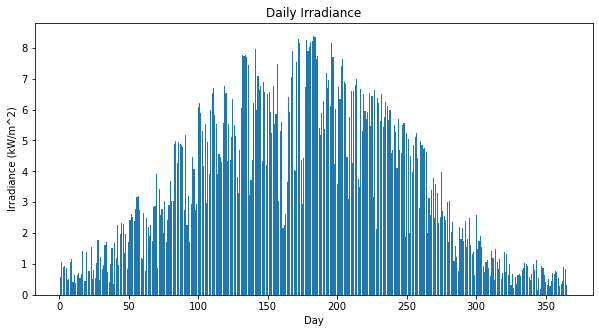

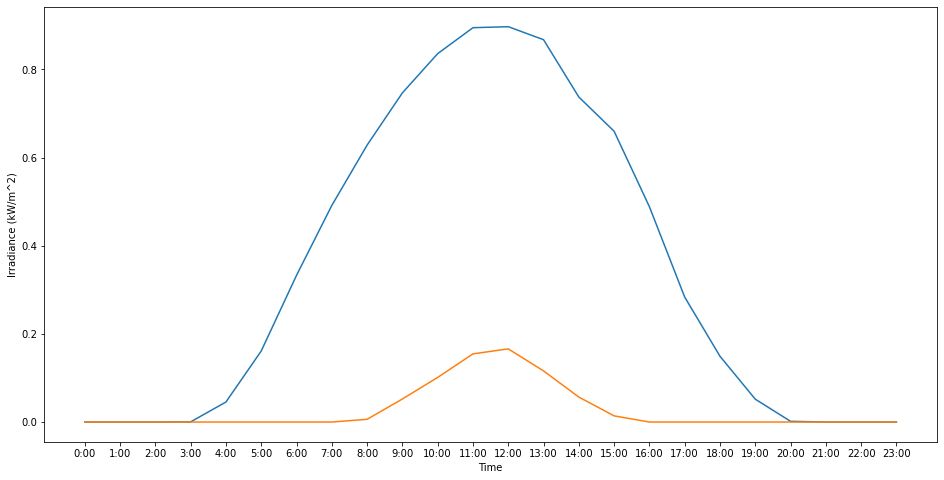

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#just irradiance section, pv comes in second section

#set up data with relevant columns for irradiance
df = pd.read_csv("file:///C:/Users/Sasha/Downloads/ninja_weather_51.7508_-1.2538_uncorrected.csv")
#directIrr = df["directIrr"]
#diffuseIrr = df["diffuseIrr"]
totalIrr = 0.001*df["radiation_surface"] #gives radiation in kW/m^2

#initialise data set and relevant values
dailyIrr = []
hoursNum = 24
daysNum = len(totalIrr)/hoursNum
hourSet = ["0:00", "1:00", "2:00", "3:00", "4:00", "5:00", "6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"]
Days1 = 172
Days2 = 356


day = 1

while day < daysNum + 1:
    hour = 1
    dayIrr = 0
    
    while hour < hoursNum + 1:
        
        dayIrr = dayIrr + totalIrr[((day-1)*hoursNum)+(hour-1)]
        
        hour = hour + 1
    
    dailyIrr.append(dayIrr)
    day = day + 1


daySet = np.arange(1,daysNum + 1)
plt.figure(figsize=(10,5))
plt.bar(daySet, dailyIrr,)

plt.title("Daily Irradiance")
plt.xlabel("Day")
plt.ylabel("Irradiance (kW/m^2)")
plt.show()

plt.figure(figsize = (16,8))
plt.plot(hourSet,totalIrr[(Days1-1)*hoursNum:(Days1*hoursNum)])
plt.plot(hourSet,totalIrr[(Days2-1)*hoursNum:(Days2*hoursNum)])

#plt.title("Hourly Irradiance")
plt.xlabel("Time")
plt.ylabel("Irradiance (kW/m^2)")
plt.show()



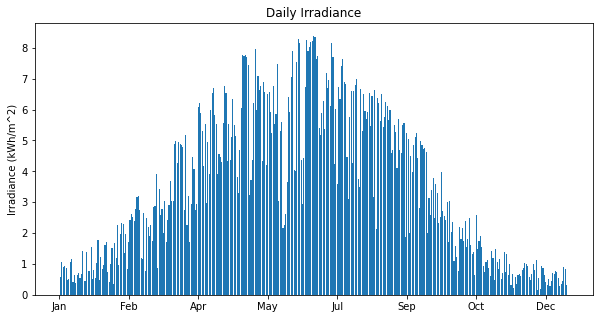

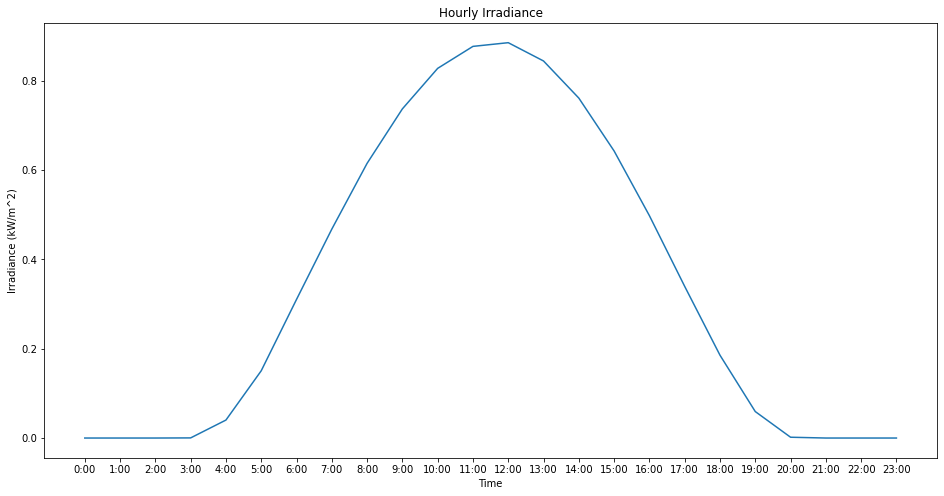

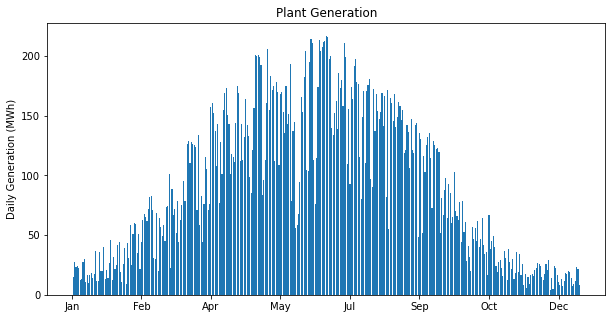

yearly generation in MWh = 
32521.131555182288
32521131.555182315
            0
0    0.569987
1    1.047297
2    0.894359
3    0.922454
4    0.852570
..        ...
360  0.342984
361  0.459932
362  0.889331
363  0.849774
364  0.322623

[365 rows x 1 columns]
8760
      radiation_surface
0                   0.0
1                   0.0
2                   0.0
3                   0.0
4                   0.0
...                 ...
8755                0.0
8756                0.0
8757                0.0
8758                0.0
8759                0.0

[8760 rows x 1 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: radiation_surface, Length: 8760, dtype: float64
25859.942982719997


In [48]:
#Lingxi this is the main section, you may want to copy and paste this into your script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dati


#set up data with relevant columns for irradiance
df = pd.read_csv("file:///C:/Users/Sasha/Downloads/ninja_weather_51.7508_-1.2538_uncorrected.csv")
#directIrr = df["directIrr"]
#diffuseIrr = df["diffuseIrr"]
totalIrr = 0.001*df["radiation_surface"] #gives radiation in kW/m^2

#initialise data set and relevant values
dailyIrr = []
dailyIrrMW = []
hoursNum = 24
daysNum = len(totalIrr)/hoursNum
hourSet = ["0:00", "1:00", "2:00", "3:00", "4:00", "5:00", "6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"]
Days = 178

totalIrrMW = 0.001*totalIrr;
#the class immediately below isn't rly relevant, was j a practice like in notes, the pvAsset is very much useful tho
class solar_model:
    """Non-dispatchable asset base class"""
    def __init__(self):
        self.capacity = 144 #kW
        self.efficiency = 0.17 #taken from average, will be specified
        self.area = 1.9404 #m^2, taken from 72 cell 99*196cm panel
        
#class for pvAsset
class pvAsset(solar_model):
    """PV Asset Class"""
    def __init__(self, capacity, efficiency, area, nPanels):
        self.capacity = capacity
        self.efficiency = efficiency
        self.area = area
        self.nPanels = nPanels
pv1 = pvAsset(300,0.17,1.6368,100)
pv2 = pvAsset(250,0.156,1.6368,200)
pv10MW = pvAsset(300,0.183,1.6368,34000)
pv15MW = pvAsset(300,0.183,1.6368,50000)
pv20MW = pvAsset(300,0.183,1.6368,67000)
pv25MW = pvAsset(300,0.183,1.6368,84000)
pv30MW = pvAsset(300,0.183,1.6368,100000)
pv37MW = pvAsset(300,0.183,1.6368,123334)
pv50MW = pvAsset(300,0.183,1.6368,167000)

pvChosen = pv37MW

percAreaEff = 0.7 #due to angles of tilt vs sunlight etc

total_capacity = pvChosen.nPanels*pvChosen.capacity
total_Area = pvChosen.nPanels*pvChosen.area*percAreaEff

areaEff = total_Area*pvChosen.efficiency

dailyGenMW = []

day = 1

while day < daysNum + 1:
    hour = 1
    dayIrr = 0
    dayGenMW = 0
    while hour < hoursNum + 1:
        
        dayIrr = dayIrr + totalIrr[((day-1)*hoursNum)+(hour-1)]
        dayGenMW = dayGenMW + 0.001*areaEff*totalIrr[((day-1)*hoursNum)+(hour-1)]
        hour = hour + 1
    
    dailyIrr.append(dayIrr)
    dailyGenMW.append(dayGenMW)
    day = day + 1

dailyIrr1 = pd.DataFrame(dailyIrr)

    
#x = 0

#while x< len(dailyIrr) +1:
 #   
  #  dayIrrMW = 0.001*dailyIrr[i];
   # 
    #dailyIrrMW.append(dayIrrMW)
    #
     #x = x + 1

daySet = np.arange(1,daysNum + 1)
plt.figure(figsize=(10,5))
plt.bar(daySet, dailyIrr,)

plt.title("Daily Irradiance")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.xlabel("Day")

plt.ylabel("Irradiance (kWh/m^2)")
plt.show()

plt.figure(figsize = (16,8))
plt.plot(hourSet,totalIrr[(Days-1)*hoursNum:Days*hoursNum])

plt.title("Hourly Irradiance")
plt.xlabel("Time")
plt.ylabel("Irradiance (kW/m^2)")
plt.show()

#gotta be careful here - irradiance needs to account for time methinkst
#the reason i originally didn't change it is because it is for one hour each, so kWh is just kW for the hour * 1 so no change needed



#dailyGen = []
#dailyGenMW = []

#loop to turn irradiance into generation
#i = 0

#while i < len(dailyIrr):

 #   dayGen = areaEff*dailyIrr[i]
  #  dayGenMW = dayGen/1000
   # dailyGen.append(dayGen)
    #dailyGenMW.append(dayGenMW)
    
    #i = i + 1
    
#hourlyGen = []
#hourlyGenMW = []

#while i < len(totalIrr):

 #   hourGen = areaEff*totalIrr[i]
  #  hourGenMW = hourGen/1000
   # hourlyGen.append(hourGen)
    #hourlyGenMW.append(hourGenMW)
    
    #i = i + 1

hourlyGen1 = areaEff*totalIrr
#dailyGenMW1 = 0.001*areaEff*dailyIrr1

#dailyGenMW = []
#dm = 0
#while dm< len(dailyGenMW1) + 1:
 #   dayGenMW = 1*dailyGenMW1[i]
  #  dailyGenMW.append(dayGenMW)
   # dm = dm + 1


#i = 0
#while i< len(dailyIrrMW) + 1 :
 #   dayGenMW = areaEff*dailyIrrMW[i]
  #  dailyGenMW.append(dayGenMW)
   # 
    #i = i + 1
    

    
plt.figure(figsize=(10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet, dailyGenMW,)


plt.title("Plant Generation")
plt.ylabel("Daily Generation (MWh)")
plt.show()

yearGen = sum(dailyGenMW)

dailyGen1 = pd.DataFrame(hourlyGen1)
dailyGen1.to_csv('OxfordSolar37MWhourly.csv')

print("yearly generation in MWh = ")
print(yearGen)
print(sum(hourlyGen1))
print(dailyIrr1)
print(len(totalIrr))
print(dailyGen1)
print(totalIrr)
#print(len(hourlyGen))
print(areaEff)
#Lingxi this is the end of the main section

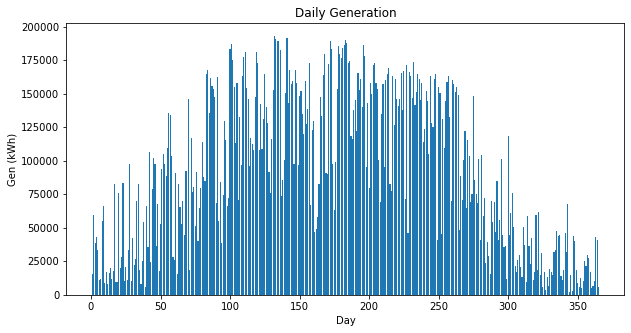

yearly generation in kWh = 
33683354.93999998


In [41]:
#set up data with relevant columns for irradiance
df = pd.read_csv("file:///C:/Users/Sasha/Downloads/ninja_pv_51.7508_-1.2538_corrected.csv")
#directIrr = df["directIrr"]
#diffuseIrr = df["diffuseIrr"]
totalGen = df["electricity"] #gives radiation in kW/m^2

dailyGen = []
hoursNum = 24
daysNum = len(totalGen)/hoursNum
hourSet = ["0:00", "1:00", "2:00", "3:00", "4:00", "5:00", "6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"]
Days = 178


day = 1

while day < daysNum + 1:
    hour = 1
    dayGen = 0
    
    while hour < hoursNum + 1:
        
        dayGen = dayGen + totalGen[((day-1)*hoursNum)+(hour-1)]
        
        hour = hour + 1
    
    dailyGen.append(dayGen)
    day = day + 1

daySet = np.arange(1,daysNum + 1)
plt.figure(figsize=(10,5))
plt.bar(daySet, dailyGen,)

plt.title("Daily Generation")
plt.xlabel("Day")
plt.ylabel("Gen (kWh)")
plt.show()

yearGen = sum(dailyGen)
print("yearly generation in kWh = ")
print(yearGen)

In [42]:
print((33683354-29038642)/33683354)

0.13789339387045602
